## Import relevant libraries and load dataset.

In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load train.csv into pandas dataframe
train_df = pd.read_csv("train.csv")
# print the first 5 rows
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [3]:
# drop features id and target from train_df 
train = train_df.drop(["id","target"],axis=1)
# print the first 5 rows
train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [4]:
# load test.csv into pandas dataframe
test_df = pd.read_csv("test.csv")
# print the first 5 rows
test_df.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [5]:
# drop feature id from test_df 
test = test_df.drop(["id"],axis=1)
# print the first 5 rows
test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


## 4. Featurization and Feature Engineering.

### 4.1 Basic Mathematical Operations

In [6]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# compute arithmetic mean along axis 1 (row wise)
train_mean = np.mean(train,axis=1)
print("Mean of first 5 rows:")
print(train_mean[:5])
print("Size of train_mean:",len(train_mean))

Mean of first 5 rows:
0   -0.009223
1    0.086130
2    0.027657
3    0.088357
4    0.134413
dtype: float64
Size of train_mean: 250


In [7]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.std.html
# compute standard deviation along axis 1 (row wise)
train_std = np.std(train,axis=1)
print("Standard Deviation of first 5 rows:")
print(train_std[:5])
print("Size of train_std:",len(train_std))

Standard Deviation of first 5 rows:
0    1.087355
1    0.984194
2    1.011068
3    0.938176
4    0.939707
dtype: float64
Size of train_std: 250


### Quantile Operations

In [8]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
# compute 25th quantile along axis 1 (row wise)
train_quantile25 = np.quantile(train,0.25,axis=1)
print("25th Quantile of first 5 rows:")
print(train_quantile25[:5])
print("Size of train_quantile25:",len(train_quantile25))

25th Quantile of first 5 rows:
[-0.77575 -0.5515  -0.70875 -0.6105  -0.47425]
Size of train_quantile25: 250


In [9]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
# compute 50th quantile along axis 1 (row wise)
train_quantile50 = np.quantile(train,0.50,axis=1)
print("50th Quantile of first 5 rows:")
print(train_quantile50[:5])
print("Size of train_quantile50:",len(train_quantile50))

50th Quantile of first 5 rows:
[-0.0505  0.0745  0.0285  0.1525  0.112 ]
Size of train_quantile50: 250


In [10]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.quantile.html
# compute 75th quantile along axis 1 (row wise)
train_quantile75 = np.quantile(train,0.75,axis=1)
print("75th Quantile of first 5 rows:")
print(train_quantile75[:5])
print("Size of train_quantile75:",len(train_quantile75))

75th Quantile of first 5 rows:
[0.79625 0.74275 0.66075 0.74525 0.69475]
Size of train_quantile75: 250


### 4.2 Trignometric Operations 

In [11]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.sin.html
# compute trigonometric sine, element-wise then take mean of each row.
sine = np.sin(train)
train_sine = np.mean(sine,axis=1)
print("Sine of first 5 rows:")
print(train_sine[:5])
print("Size of train_sine:",len(train_sine))

Sine of first 5 rows:
0   -0.010536
1    0.075490
2   -0.005509
3    0.046067
4    0.059548
dtype: float64
Size of train_sine: 250


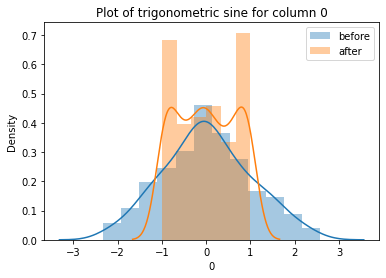

In [12]:
# Visualization of column 0 after applying trigonometric sine
sns.distplot(train['0'], label="before")
sns.distplot(sine['0'], label="after")
plt.title('Plot of trigonometric sine for column 0')
plt.legend()
plt.show()

In [13]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.cos.html
# compute trigonometric cosine, element-wise then take mean of each row.
cosine = np.cos(train)
train_cosine = np.mean(cosine,axis=1)
print("Cosin of first 5 rows:")
print(train_cosine[:5])
print("Size of train_cosin:",len(train_cosine))

Cosin of first 5 rows:
0    0.537968
1    0.611600
2    0.599358
3    0.645721
4    0.643508
dtype: float64
Size of train_cosin: 250


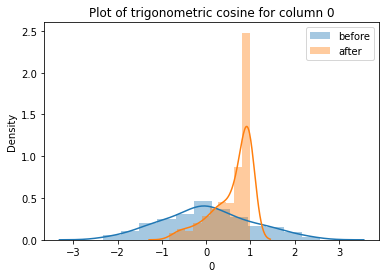

In [14]:
# Visualization of column 0 after applying trigonometric cosine
sns.distplot(train['0'], label="before")
sns.distplot(cosine['0'], label="after")
plt.title('Plot of trigonometric cosine for column 0')
plt.legend()
plt.show()

In [15]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.tan.html
# compute trigonometric tangent, element-wise then take mean of each row.
tangent = np.tan(train)
train_tangent = np.mean(tangent,axis=1)
print("Tangent of first 5 rows:")
print(train_tangent[:5])
print("Size of train_tangent:",len(train_tangent))

Tangent of first 5 rows:
0   -0.315591
1    0.607457
2    0.104777
3    0.891722
4    0.274261
dtype: float64
Size of train_tangent: 250


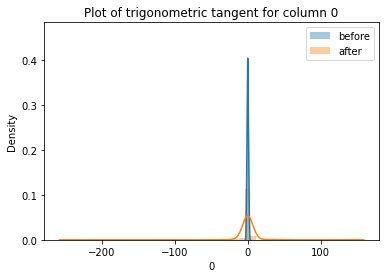

In [16]:
# Visualization of column 0 after applying trigonometric tangent
sns.distplot(train['0'], label="before")
sns.distplot(tangent['0'], label="after")
plt.title('Plot of trigonometric tangent for column 0')
plt.legend()
plt.show()

In [17]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.arcsin.html
# compute trignometric inverse sine, element-wise then take mean of each row.
inversesine = np.arcsin(train)
train_inversesine = np.mean(inversesine,axis=1)
print("Inverse sine of first 5 rows:")
print(train_inversesine[:5])
print("Size of train_inversesine:",len(train_inversesine))

Inverse sine of first 5 rows:
0   -0.037529
1    0.058173
2   -0.014537
3    0.014575
4    0.013183
dtype: float64
Size of train_inversesine: 250


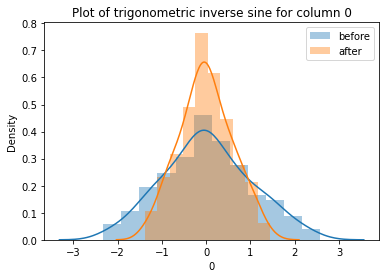

In [18]:
# Visualization of column 0 after applying trigonometric inverse sine
sns.distplot(train['0'], label="before")
sns.distplot(inversesine['0'], label="after")
plt.title('Plot of trigonometric inverse sine for column 0')
plt.legend()
plt.show()

In [19]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.arccos.html
# compute trigonometric inverse cosine, element-wise then take mean of each row.
inversecosine = np.arccos(train)
train_inversecosine = np.mean(inversecosine,axis=1)
print("Inverse cosine of first 5 rows:")
print(train_inversecosine[:5])
print("Size of train_inversecosine:",len(train_inversecosine))

Inverse cosine of first 5 rows:
0    1.608326
1    1.512623
2    1.585333
3    1.556221
4    1.557613
dtype: float64
Size of train_inversecosine: 250


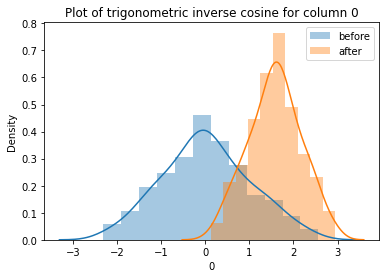

In [20]:
# Visualization of column 0 after applying trigonometric inverse cosine
sns.distplot(train['0'], label="before")
sns.distplot(inversecosine['0'], label="after")
plt.title('Plot of trigonometric inverse cosine for column 0')
plt.legend()
plt.show()

In [21]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.arctan.html
# compute trigonometric inverse tangent, element-wise then take mean of each row.
inversetangent = np.arctan(train)
train_inversetangent = np.mean(inversetangent,axis=1)
print("Inverse tangent of first 5 rows:")
print(train_inversetangent[:5])
print("Size of train_inversetangent:",len(train_inversetangent))

Inverse tangent of first 5 rows:
0   -0.010571
1    0.067941
2    0.006444
3    0.057935
4    0.076936
dtype: float64
Size of train_inversetangent: 250


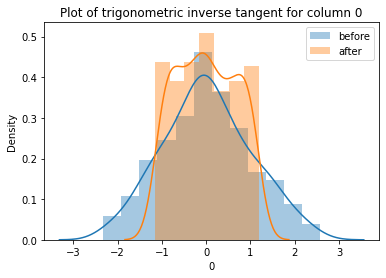

In [22]:
# Visualization of column 0 after applying trigonometric inverse tangent
sns.distplot(train['0'], label="before")
sns.distplot(inversetangent['0'], label="after")
plt.title('Plot of trigonometric inverse tangent for column 0')
plt.legend()
plt.show()

### 4.3 Hyperbolic Operations

In [23]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.sinh.html
# compute hyperbolic sine, element-wise then take mean of each row.
hyperbolicsine = np.sinh(train)
train_hyperbolicsine = np.mean(hyperbolicsine,axis=1)
print("Hyperbolic sine of first 5 rows:")
print(train_hyperbolicsine[:5])
print("Size of train_hyperbolicsine:",len(train_hyperbolicsine))

Hyperbolic sine of first 5 rows:
0   -0.004502
1    0.089790
2    0.086690
3    0.180076
4    0.277209
dtype: float64
Size of train_hyperbolicsine: 250


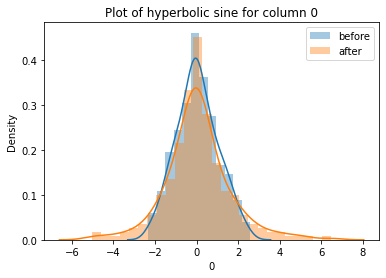

In [24]:
# Visualization of column 0 after applying hyperbolic sine
sns.distplot(train['0'], label="before")
sns.distplot(hyperbolicsine['0'], label="after")
plt.title('Plot of hyperbolic sine for column 0')
plt.legend()
plt.show()

In [25]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.cosh.html
# compute hyperbolic cosine, element-wise then take mean of each row.
hyperboliccosine = np.cosh(train)
train_hyperboliccosine = np.mean(hyperboliccosine,axis=1)
print("Hyperbolic cosine of first 5 rows:")
print(train_hyperboliccosine[:5])
print("Size of train_hyperboliccosine:",len(train_hyperboliccosine))

Hyperbolic cosine of first 5 rows:
0    1.765149
1    1.622502
2    1.662417
3    1.572025
4    1.584532
dtype: float64
Size of train_hyperboliccosine: 250


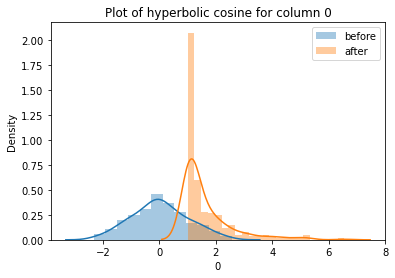

In [26]:
# Visualization of column 0 after applying hyperbolic cosine
sns.distplot(train['0'], label="before")
sns.distplot(hyperboliccosine['0'], label="after")
plt.title('Plot of hyperbolic cosine for column 0')
plt.legend()
plt.show()

In [27]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.tanh.html
# compute hyperbolic tangent, element-wise then take mean of each row.
hyperbolictangent = np.tanh(train)
train_hyperbolictangent = np.mean(hyperbolictangent,axis=1)
print("Hyperbolic tangent of first 5 rows:")
print(train_hyperbolictangent[:5])
print("Size of train_hyperbolictangent:",len(train_hyperbolictangent))

Hyperbolic tangent of first 5 rows:
0   -0.010765
1    0.065681
2    0.002687
3    0.053542
4    0.068240
dtype: float64
Size of train_hyperbolictangent: 250


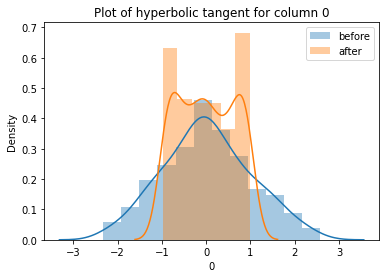

In [28]:
# Visualization of column 0 after applying hyperbolic tangent
sns.distplot(train['0'], label="before")
sns.distplot(hyperbolictangent['0'], label="after")
plt.title('Plot of hyperbolic tangent for column 0')
plt.legend()
plt.show()

### 4.4 Exponents Operations

In [29]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.exp.html
# compute exponential, element-wise then take mean of each row.
exponential = np.exp(train)
train_exponential = np.mean(exponential,axis=1)
print("Exponential of first 5 rows:")
print(train_exponential[:5])
print("Size of train_exponential:",len(train_exponential))

Exponential of first 5 rows:
0    1.760647
1    1.712292
2    1.749107
3    1.752101
4    1.861741
dtype: float64
Size of train_exponential: 250


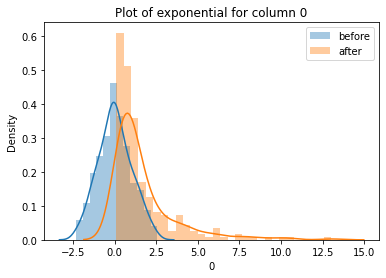

In [30]:
# Visualization of column 0 after applying exponential
sns.distplot(train['0'], label="before")
sns.distplot(exponential['0'], label="after")
plt.title('Plot of exponential for column 0')
plt.legend()
plt.show()

In [31]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.expm1.html
# compute exp(x)-1, element-wise then take mean of each row.
expm1 = np.expm1(train)
train_expm1 = np.mean(expm1,axis=1)
print("exp(x) - 1 of first 5 rows:")
print(train_expm1[:5])
print("Size of train_expm1:",len(train_expm1))

exp(x) - 1 of first 5 rows:
0    0.760647
1    0.712292
2    0.749107
3    0.752101
4    0.861741
dtype: float64
Size of train_expm1: 250


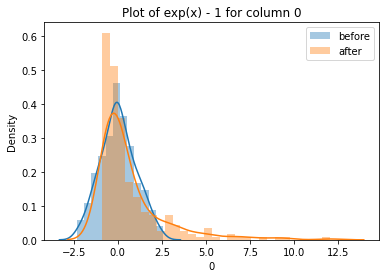

In [32]:
# Visualization of column 0 after applying exp(x)-1
sns.distplot(train['0'], label="before")
sns.distplot(expm1['0'], label="after")
plt.title('Plot of exp(x) - 1 for column 0')
plt.legend()
plt.show()

In [33]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.exp2.html
# compute 2**p for all p in the input array, element-wise then take mean of each row.
exp2 = np.exp2(train)
train_exp2 = np.mean(exp2,axis=1)
print("2**p for all p in the input array of first 5 rows:")
print(train_exp2[:5])
print("Size of train_exp2:",len(train_exp2))

2**p for all p in the input array of first 5 rows:
0    1.315869
1    1.324817
2    1.313960
3    1.326229
4    1.377569
dtype: float64
Size of train_exp2: 250


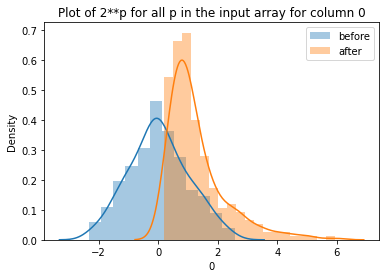

In [34]:
# Visualization of column 0 after applying logarithm
sns.distplot(train['0'], label="before")
sns.distplot(exp2['0'], label="after")
plt.title('Plot of 2**p for all p in the input array for column 0')
plt.legend()
plt.show()

### 4.5 Polynomial Operations

In [35]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.power.html
# compute array elements raise to the power of 2, element-wise then take mean of each row.
poweroftwo = np.power(train,2)
train_poweroftwo = np.mean(poweroftwo,axis=1)
print("Power of 2 of first 5 rows:")
print(train_poweroftwo[:5])
print("Size of train_poweroftwo:",len(train_poweroftwo))

Power of 2 of first 5 rows:
0    1.182425
1    0.976056
2    1.023024
3    0.887980
4    0.901115
dtype: float64
Size of train_poweroftwo: 250


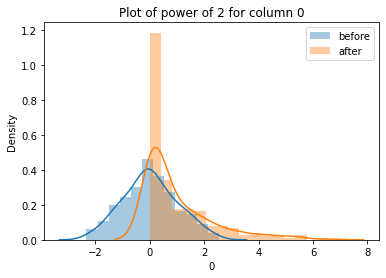

In [36]:
# Visualization of column 0 after applying power of 2
sns.distplot(train['0'], label="before")
sns.distplot(poweroftwo['0'], label="after")
plt.title('Plot of power of 2 for column 0')
plt.legend()
plt.show()

In [37]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.power.html
# compute array elements raise to the power of 3, element-wise then take mean of each row.
powerofthree = np.power(train,3)
train_powerofthree = np.mean(powerofthree,axis=1)
print("Power of 3 of first 5 rows:")
print(train_powerofthree[:5])
print("Size of train_powerofthree:",len(train_powerofthree))

Power of 3 of first 5 rows:
0    0.015243
1    0.047272
2    0.266454
3    0.371308
4    0.613952
dtype: float64
Size of train_powerofthree: 250


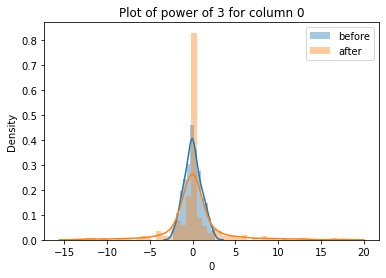

In [38]:
# Visualization of column 0 after applying power of 3
sns.distplot(train['0'], label="before")
sns.distplot(powerofthree['0'], label="after")
plt.title('Plot of power of 3 for column 0')
plt.legend()
plt.show()

In [39]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.power.html
# compute array elements raise to the power of 4, element-wise then take mean of each row.
poweroffour = np.power(train,4)
train_poweroffour = np.mean(poweroffour,axis=1)
print("Power of 4 of first 5 rows:")
print(train_poweroffour[:5])
print("Size of train_poweroffour:",len(train_poweroffour))

Power of 4 of first 5 rows:
0    3.584848
1    2.766570
2    3.092631
3    2.553467
4    2.671541
dtype: float64
Size of train_poweroffour: 250


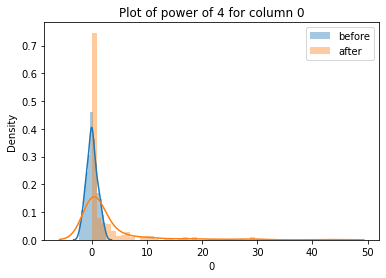

In [40]:
# Visualization of column 0 after applying power of 4
sns.distplot(train['0'], label="before")
sns.distplot(poweroffour['0'], label="after")
plt.title('Plot of power of 4 for column 0')
plt.legend()
plt.show()

In [41]:
# Combining all the above statements
def preprocessing(df):
    """
    This function performes feature engineering and adds new statistical features to the df dataframe
    """
    if "id" and "target" in df:
        data = df.drop(["id","target"],axis=1)
    else:
        data = df.drop(["id"],axis=1)
    
    # compute arithmetic mean along axis 1 (row wise)
    df_mean = np.mean(data,axis=1)
    # compute standard deviation along axis 1 (row wise)
    df_std = np.std(data,axis=1)
    
    # compute 25th quantile along axis 1 (row wise)
    df_quantile25 = np.quantile(data,0.25,axis=1)
    # compute 50th quantile along axis 1 (row wise)
    df_quantile50 = np.quantile(data,0.50,axis=1)
    # compute 75th quantile along axis 1 (row wise)
    df_quantile75 = np.quantile(data,0.75,axis=1)
    
    # compute trigonometric sine, element-wise then take mean of each row.
    sine = np.sin(data)
    df_sine = np.mean(sine,axis=1)
    # compute trigonometric cosine, element-wise then take mean of each row.
    cosine = np.cos(data)
    df_cosine = np.mean(cosine,axis=1)
    # compute trigonometric tangent, element-wise then take mean of each row.
    tangent = np.tan(data)
    df_tangent = np.mean(tangent,axis=1)
    # compute trignometric inverse sine, element-wise then take mean of each row.
    inversesine = np.arcsin(data)
    df_inversesine = np.mean(inversesine,axis=1)
    # compute trigonometric inverse cosine, element-wise then take mean of each row.
    inversecosine = np.arccos(data)
    df_inversecosine = np.mean(inversecosine,axis=1)
    # compute trigonometric inverse tangent, element-wise then take mean of each row.
    inversetangent = np.arctan(data)
    df_inversetangent = np.mean(inversetangent,axis=1)
    
    # compute hyperbolic sine, element-wise then take mean of each row.
    hyperbolicsine = np.sinh(data)
    df_hyperbolicsine = np.mean(hyperbolicsine,axis=1)
    # compute hyperbolic cosine, element-wise then take mean of each row.
    hyperboliccosine = np.cosh(data)
    df_hyperboliccosine = np.mean(hyperboliccosine,axis=1)
    # compute hyperbolic tangent, element-wise then take mean of each row.
    hyperbolictangent = np.tanh(data)
    df_hyperbolictangent = np.mean(hyperbolictangent,axis=1)
    
    # compute exponential, element-wise then take mean of each row.
    exponential = np.exp(data)
    df_exponential = np.mean(exponential,axis=1)
    # compute natural logarithm, element-wise then take mean of each row.
    expm1 = np.expm1(data)
    df_expm1 = np.mean(expm1,axis=1)
    # compute 2**p for all p in the input array, element-wise then take mean of each row.
    exp2 = np.exp2(data)
    df_exp2 = np.mean(exp2,axis=1)
    
    # compute array elements raise to the power of 2, element-wise then take mean of each row.
    poweroftwo = np.power(data,2)
    df_poweroftwo = np.mean(poweroftwo,axis=1)
    # compute array elements raise to the power of 3, element-wise then take mean of each row.
    powerofthree = np.power(data,3)
    df_powerofthree = np.mean(powerofthree,axis=1)
    # compute array elements raise to the power of 4, element-wise then take mean of each row.
    poweroffour = np.power(data,4)
    df_poweroffour = np.mean(poweroffour,axis=1)
    
    # add various new statistical features to df dataset
    df['mean'] = df_mean
    df['std'] = df_std
    
    df["quantile25"] = df_quantile25
    df["quantile50"] = df_quantile50
    df["quantile75"] = df_quantile75
    
    df['sine'] = df_sine
    df['cosine'] = df_cosine
    df['tangent'] = df_tangent
    df['inversesine'] = df_inversesine
    df['inversecosine'] = df_inversecosine
    df['inversetangent'] = df_inversetangent
    
    df['hyperbolicsine'] = df_hyperbolicsine
    df['hyperboliccosine'] = df_hyperboliccosine
    df['hyperbolictangent'] = df_hyperbolictangent
    
    df['exponential'] = df_exponential
    df['exponentialm1'] = df_expm1
    df["exponential2"] = df_exp2
    
    df['poweroftwo'] = df_poweroftwo
    df['powerofthree'] = df_powerofthree
    df['poweroffour'] = df_poweroffour
    return df

In [42]:
# Training Dataset
# load train.csv into pandas dataframe
train_df = pd.read_csv("train.csv")
preprocessed_train = preprocessing(train_df)
# print the first 5 rows
preprocessed_train.head()

,id,target,0,1,2,3,4,5,6,7,...,inversetangent,hyperbolicsine,hyperboliccosine,hyperbolictangent,exponential,exponentialm1,exponential2,poweroftwo,powerofthree,poweroffour
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,-0.010571,-0.004502,1.765149,-0.010765,1.760647,0.760647,1.315869,1.182425,0.015243,3.584848
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,0.067941,0.089790,1.622502,0.065681,1.712292,0.712292,1.324817,0.976056,0.047272,2.766570
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.006444,0.086690,1.662417,0.002687,1.749107,0.749107,1.313960,1.023024,0.266454,3.092631
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,0.057935,0.180076,1.572025,0.053542,1.752101,0.752101,1.326229,0.887980,0.371308,2.553467
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.076936,0.277209,1.584532,0.068240,1.861741,0.861741,1.377569,0.901115,0.613952,2.671541


In [43]:
# Test Dataset
# load test.csv into pandas dataframe
test_df = pd.read_csv("test.csv")
preprocessed_test = preprocessing(test_df)
# print the first 5 rows
preprocessed_test.head()

,id,0,1,2,3,4,5,6,7,8,...,inversetangent,hyperbolicsine,hyperboliccosine,hyperbolictangent,exponential,exponentialm1,exponential2,poweroftwo,powerofthree,poweroffour
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,0.103791,0.264990,1.639407,0.097112,1.904397,0.904397,1.404195,0.985912,0.477020,2.913247
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.021779,-0.065305,1.707521,-0.020326,1.642217,0.642217,1.265487,1.094274,-0.128315,3.281111
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.025656,-0.131476,1.649251,-0.022351,1.517775,0.517775,1.214393,0.994294,-0.330590,3.062801
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,0.001523,-0.022843,1.589608,0.003396,1.566765,0.566765,1.243412,0.956136,-0.076546,2.382968
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,0.071672,0.195819,1.653205,0.064720,1.849024,0.849024,1.374870,0.988710,0.371320,3.079160


In [44]:
# how many datapoints and features present in train and test dataset
print("Preprocessed Training Dataset:",preprocessed_train.shape)
print("Preprocessed Test Dataset    :",preprocessed_test.shape)

Preprocessed Training Dataset: (250, 322)
Preprocessed Test Dataset    : (19750, 321)


In [45]:
# write pandas DataFrame to CSV file
preprocessed_train.to_csv("preprocessed_train.csv", index=False)
preprocessed_test.to_csv("preprocessed_test.csv", index=False)

Observations: <br>
<ol>
    1. Feature engineering is one of the most critical aspects of this Kaggle problem. So, we have come up with various new
    statistics features, including basic mathematical operations, quantile operations, trigonometric functions, hyperbolic functions, exponents, and polynomial operations.<br>
    2. We have added 20 new statistical features to the training and test dataset.<br>
</ol>